<a href="https://colab.research.google.com/github/KPC6796/CNN_CIFAR10/blob/main/Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries
import numpy as np # linear algebra
import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [2]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


CIFAR-10 is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class. We can look at some of the images below.

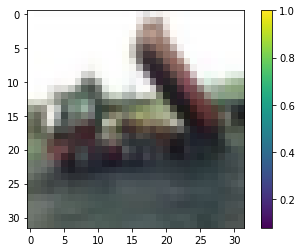

In [4]:
plt.figure()
plt.imshow(X_train[2])
plt.colorbar()
plt.grid(False)

plt.show()

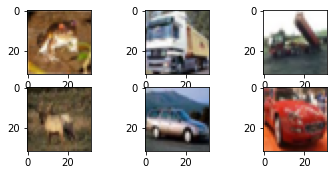

In [5]:
for i in range(6):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i])
plt.show()

In [6]:
num_class = len(set(y_train))
print("Number Of Classes: ", num_class)

Number Of Classes:  10


The Keras functional API is a way to create models that are more flexible than the tf.keras.Sequential API. The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs.

The main idea is that a deep learning model is usually a directed acyclic graph (DAG) of layers. So the functional API is a way to build graphs of layers.

In [7]:
i = Input(shape = X_train[0].shape)
x = Conv2D(32, (3,3), padding="same", activation="relu")(i)
x = Conv2D(32, (3,3), activation="relu")(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.30)(x)
x = Conv2D(64, (3,3), padding="same", activation="relu")(x)
x = Conv2D(64, (3,3), activation="relu")(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.30)(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(num_class, activation="softmax")(x)

model = Model(i, x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928 

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 236s 151ms/step - loss: 1.9158 - accuracy: 0.3272 - val_loss: 1.2039 - val_accuracy: 0.5621
Epoch 2/10
1563/1563 [==============================] - 239s 153ms/step - loss: 1.3171 - accuracy: 0.5318 - val_loss: 1.1410 - val_accuracy: 0.5950
Epoch 3/10
1563/1563 [==============================] - 238s 152ms/step - loss: 1.1561 - accuracy: 0.5901 - val_loss: 0.9821 - val_accuracy: 0.6512
Epoch 4/10
1563/1563 [==============================] - 237s 152ms/step - loss: 1.0690 - accuracy: 0.6251 - val_loss: 1.0399 - val_accuracy: 0.6303
Epoch 5/10
1563/1563 [==============================] - 241s 154ms/step - loss: 0.9673 - accuracy: 0.6567 - val_loss: 0.7927 - val_accuracy: 0.7219
Epoch 6/10
1563/1563 [==============================] - 240s 153ms/step - loss: 0.9097 - accuracy: 0.6817 - val_loss: 0.8922 - val_accuracy: 0.6832
Epoch 7/10
1563/1563 [==============================] - 240s 154ms/step - loss: 0.8660 - accuracy: 0.6938 - val_

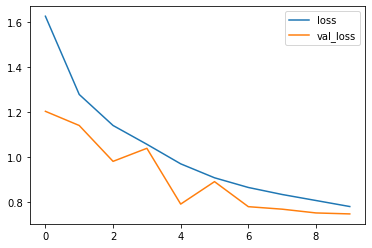

In [10]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

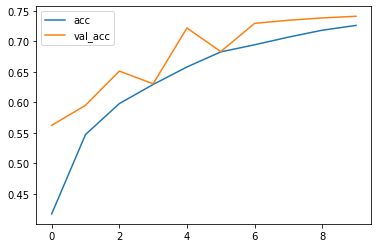

In [11]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()